# Mini project: World Development Indicators

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [330]:
data = pd.read_csv('/Users/nguyenhien/Library/CloudStorage/OneDrive-Personal/Documents/Data Science path/Machine Learning/Course/DS_UC SanDiego/Python/Week 5-Visualization/Data/Indicators.csv')
data.shape

(5656458, 6)

In [331]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

Finding suitable indicators:
- Some of the topics I'm mostly curious are "expenditure", "income", "saving" which seems to starts with "NE", "NY" in their code. So I firstly find all related indicators in the dataset and learn about their description from it's sources link "databank.worldbank.org"

In [332]:
df_expense = data[data['IndicatorName'].str.contains('expenditure')]['IndicatorName'].unique().tolist()
df_income = data[data['IndicatorName'].str.contains('income')]['IndicatorName'].unique().tolist()
df_saving = data[data['IndicatorName'].str.contains('saving')]['IndicatorName'].unique().tolist()
df_gpd = data[data['IndicatorName'].str.contains('GDP')]['IndicatorName'].unique().tolist()

# Which country offers the best market potential for exporting our luxury products, irrespective of geographical distance?
To address the question with the dataset, I would evaluate nations that meet the following criteria in the lattest year: (1) significant population or income, (2) a prevalent culture of high private sector consumption, and (3) a tendency towards non-negative saving (to prevent risk on policies change in short-time)

The 3 indicators needed for above criteria found out in dataset:
1.  GPD (current US$) *(due to the unrelevant currency it should be calculated from dataset)*
2.  Household final consumption expenditure, etc. (% of GDP) *(existed in dataset)*
3.  Gross domestic savings (% of GDP) *(existed in dataset)*

(*) Term description taken from dataset's source https://databank.worldbank.org/ :
  - **'Gross domestic savings (% of GDP)'**: Gross domestic savings are calculated as GDP less final consumption expenditure (total consumption).
  - 'Final consumption expenditure (% of GDP)': Final consumption expenditure (formerly total consumption) is the sum of household final consumption expenditure (private consumption) and general government final consumption expenditure (general government consumption). This estimate includes any statistical discrepancy in the use of resources relative to the supply of resources.
  - So we understand from the dataset: GDP = Household expenditure + government expenditure + domestic savings

Equation can be used:
  - GPD (current US$) = Household final consumption expenditure (current US$)/ Household final consumption expenditure, etc. (% of GDP)

In [239]:
main_df = data[data['IndicatorName'].str.contains('Gross domestic savings (% of GDP)', regex=False) |
               data['IndicatorName'].str.contains('Household final consumption expenditure, etc. (% of GDP)', regex=False) |
               data['IndicatorName'].str.contains('Household final consumption expenditure (current US$)', regex=False)
               ]
main_df.sort_values('Year')


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22296,United States,USA,Gross domestic savings (% of GDP),NY.GDS.TOTL.ZS,1960,2.330204e+01
22311,United States,USA,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,1960,3.316000e+11
22312,United States,USA,"Household final consumption expenditure, etc. ...",NE.CON.PETC.ZS,1960,6.105283e+01
48774,United States,USA,Gross domestic savings (% of GDP),NY.GDS.TOTL.ZS,1961,2.334458e+01
48789,United States,USA,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,1961,3.420000e+11
...,...,...,...,...,...,...
5370114,United States,USA,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,2012,1.105063e+13
5370117,United States,USA,"Household final consumption expenditure, etc. ...",NE.CON.PETC.ZS,2012,6.841813e+01
5527485,United States,USA,Gross domestic savings (% of GDP),NY.GDS.TOTL.ZS,2013,1.639368e+01
5527539,United States,USA,Household final consumption expenditure (curre...,NE.CON.PRVT.CD,2013,1.139229e+13


In [285]:
main_df_2 = main_df.pivot(index=['CountryName', 'CountryCode', 'Year'],
                      columns='IndicatorName',
                      values='Value').reset_index()
main_df_2 = main_df_2.rename(columns={'Gross domestic savings (% of GDP)': 'Saving_percent',
                                      'Household final consumption expenditure, etc. (% of GDP)': 'consumption_percent',
                                      'Household final consumption expenditure (current US$)': 'consumption_uds'})

main_df_2['consumption_percent_2'] = main_df_2['consumption_percent']/100
main_df_2['GPD_usd'] = main_df_2['consumption_uds'] /main_df_2['consumption_percent'] 
main_df_3 = main_df_2.dropna()
main_df_con3 = main_df_3[(main_df_3['Saving_percent'] > 0) 
                         & (main_df_3['Year'] == 2013)
                         &(~main_df_3['CountryName'].str.contains('income'))
                         & (~main_df_3['CountryName'].str.contains('developing'))
                         & (~main_df_3['CountryName'].str.contains('area'))
                         & (~main_df_3['CountryName'].str.contains('Union'))
                         & (~main_df_3['CountryName'].str.contains('Asia'))
                         & (~main_df_3['CountryName'].str.contains('Europe'))
                         & (~main_df_3['CountryName'].str.contains('America'))
                         & (~main_df_3['CountryName'].str.contains('countries'))
                         & (~main_df_3['CountryName'].str.contains('members'))
                         & (~main_df_3['CountryName'].str.contains('World'))
                        ]
main_df_con3.sort_values('CountryName')

IndicatorName,CountryName,CountryCode,Year,Saving_percent,consumption_uds,consumption_percent,consumption_percent_2,GPD_usd
65,Albania,ALB,2013,10.327126,9.977576e+09,78.803442,0.788034,1.266135e+08
120,Algeria,DZA,2013,46.193342,7.269622e+10,34.666188,0.346662,2.097035e+09
149,Angola,AGO,2013,38.185651,4.508882e+10,34.915478,0.349155,1.291371e+09
186,Antigua and Barbuda,ATG,2013,9.107374,8.727913e+08,73.994726,0.739947,1.179532e+07
280,Argentina,ARG,2013,18.476206,4.049111e+11,65.941821,0.659418,6.140429e+09
...,...,...,...,...,...,...,...,...
8686,United States,USA,2013,16.393683,1.139229e+13,68.565993,0.685660,1.661507e+11
8795,Uruguay,URY,2013,19.981010,3.822515e+10,66.450034,0.664500,5.752465e+08
8820,Uzbekistan,UZB,2013,18.213702,2.158235e+10,52.786298,0.527863,4.088627e+08
8852,Vanuatu,VUT,2013,22.447660,4.898961e+08,61.289131,0.612891,7.993197e+06


/var/folders/gc/hn9lsns13v1bgkk9czwnynyr0000gn/T/ipykernel_16446/4208782702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_con3['GPD_usd_2'] = main_df_con3['GPD_usd']/10**9


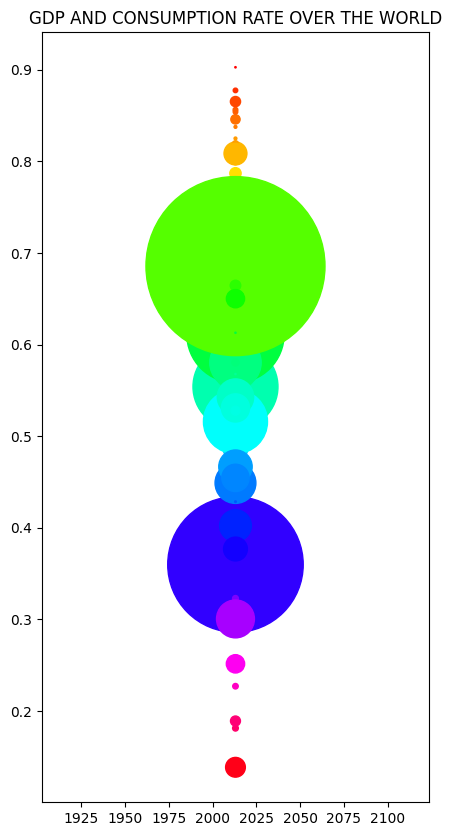

In [333]:
import numpy as np
import matplotlib.pyplot as plt


main_df_con3['GPD_usd_2'] = main_df_con3['GPD_usd']/10**9

radius   = main_df_con3['consumption_percent_2']
angles   = main_df_con3['Year']
area     = 10**(-7) * main_df_con3['GPD_usd']


colors = radius

fig = plt.figure(figsize=(5, 10))
#ax = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv_r)

# Add gridlines
#ax.grid(True)

cbar = plt.colorbar(c, ax=ax)
cbar.set_label('Consumption (% GDP)')

plt.title('GDP AND CONSUMPTION RATE OVER THE WORLD')
# Add labels for each point
top_5_per = main_df_con3['GPD_usd'].quantile(0.95)
filtered_data = main_df_con3[main_df_con3['GPD_usd'] >= top_5_per]

plt.show()


/var/folders/gc/hn9lsns13v1bgkk9czwnynyr0000gn/T/ipykernel_16446/143811739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_con3['GPD_usd_2'] = main_df_con3['GPD_usd']/10**9


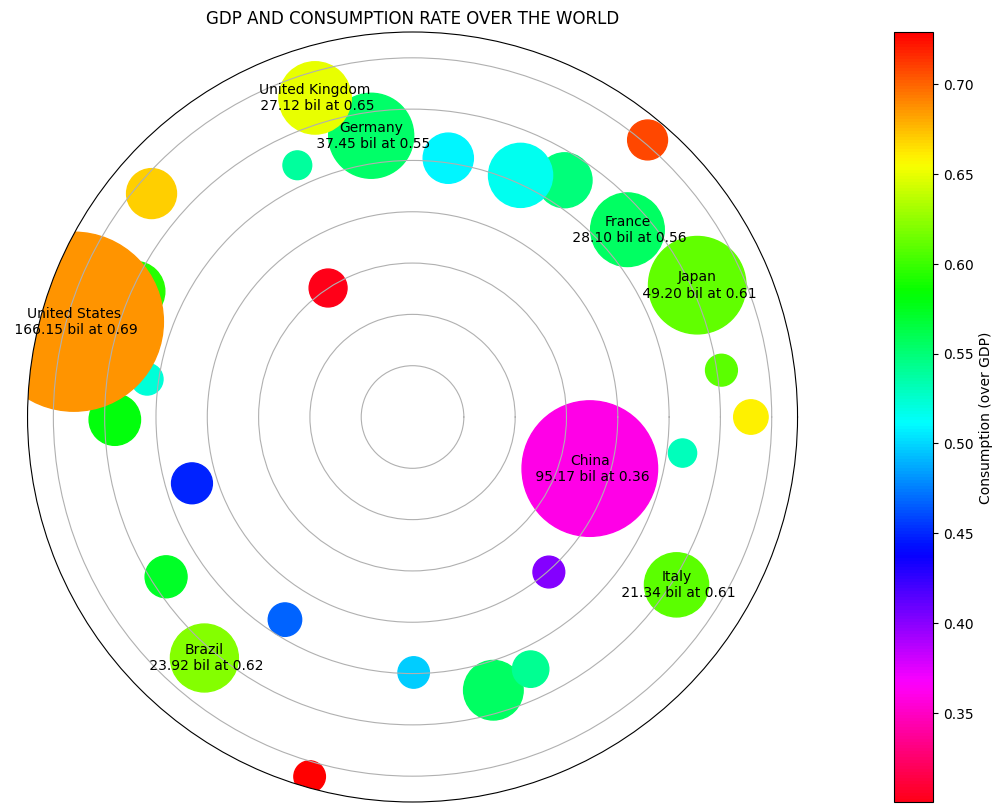

In [324]:
import numpy as np
import matplotlib.pyplot as plt

# 
main_df_con3['GPD_usd_2'] = main_df_con3['GPD_usd']/10**9
# Filter data for countries with GDP in the top 20%
top_20_percent = main_df_con3['GPD_usd'].quantile(0.8)
filtered_data = main_df_con3[main_df_con3['GPD_usd'] >= top_20_percent]

radius = filtered_data['consumption_percent_2']
angles = filtered_data['CountryName']
area = 10**(-7) * filtered_data['GPD_usd']

colors = radius

fig = plt.figure(figsize=(25, 10))
ax = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv_r)

# Add gridlines
ax.grid(True)

cbar = plt.colorbar(c, ax=ax)
cbar.set_label('Consumption (over GDP)')

plt.title('GDP AND CONSUMPTION RATE OVER THE WORLD')
# Add labels for each point
top_5_per = main_df_con3['GPD_usd'].quantile(0.95)
filtered_data = main_df_con3[main_df_con3['GPD_usd'] >= top_5_per]

radius_2 = filtered_data['consumption_percent_2']
angles_2 = filtered_data['CountryName']
for i, (ang, rad) in enumerate(zip(angles_2, radius_2)):
    data = filtered_data.iloc[i][['CountryName', 'GPD_usd_2', 'consumption_percent_2']]
    gpd = "{:.2f}".format(data['GPD_usd_2'])
    consumption = "{:.2f}".format(data['consumption_percent_2'])
    text = f"{data['CountryName']}\n {gpd} bil at {consumption}"
    plt.text(ang, rad, text, ha='center', va='center')


ax.xaxis.grid(False)  # Remove radial gridlines
ax.set_xticklabels([])  # Remove x-label
ax.set_yticklabels([])  # Remove x-label

plt.show()


/var/folders/gc/hn9lsns13v1bgkk9czwnynyr0000gn/T/ipykernel_16446/948291555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_con3['GPD_usd_2'] = main_df_con3['GPD_usd']/10**9


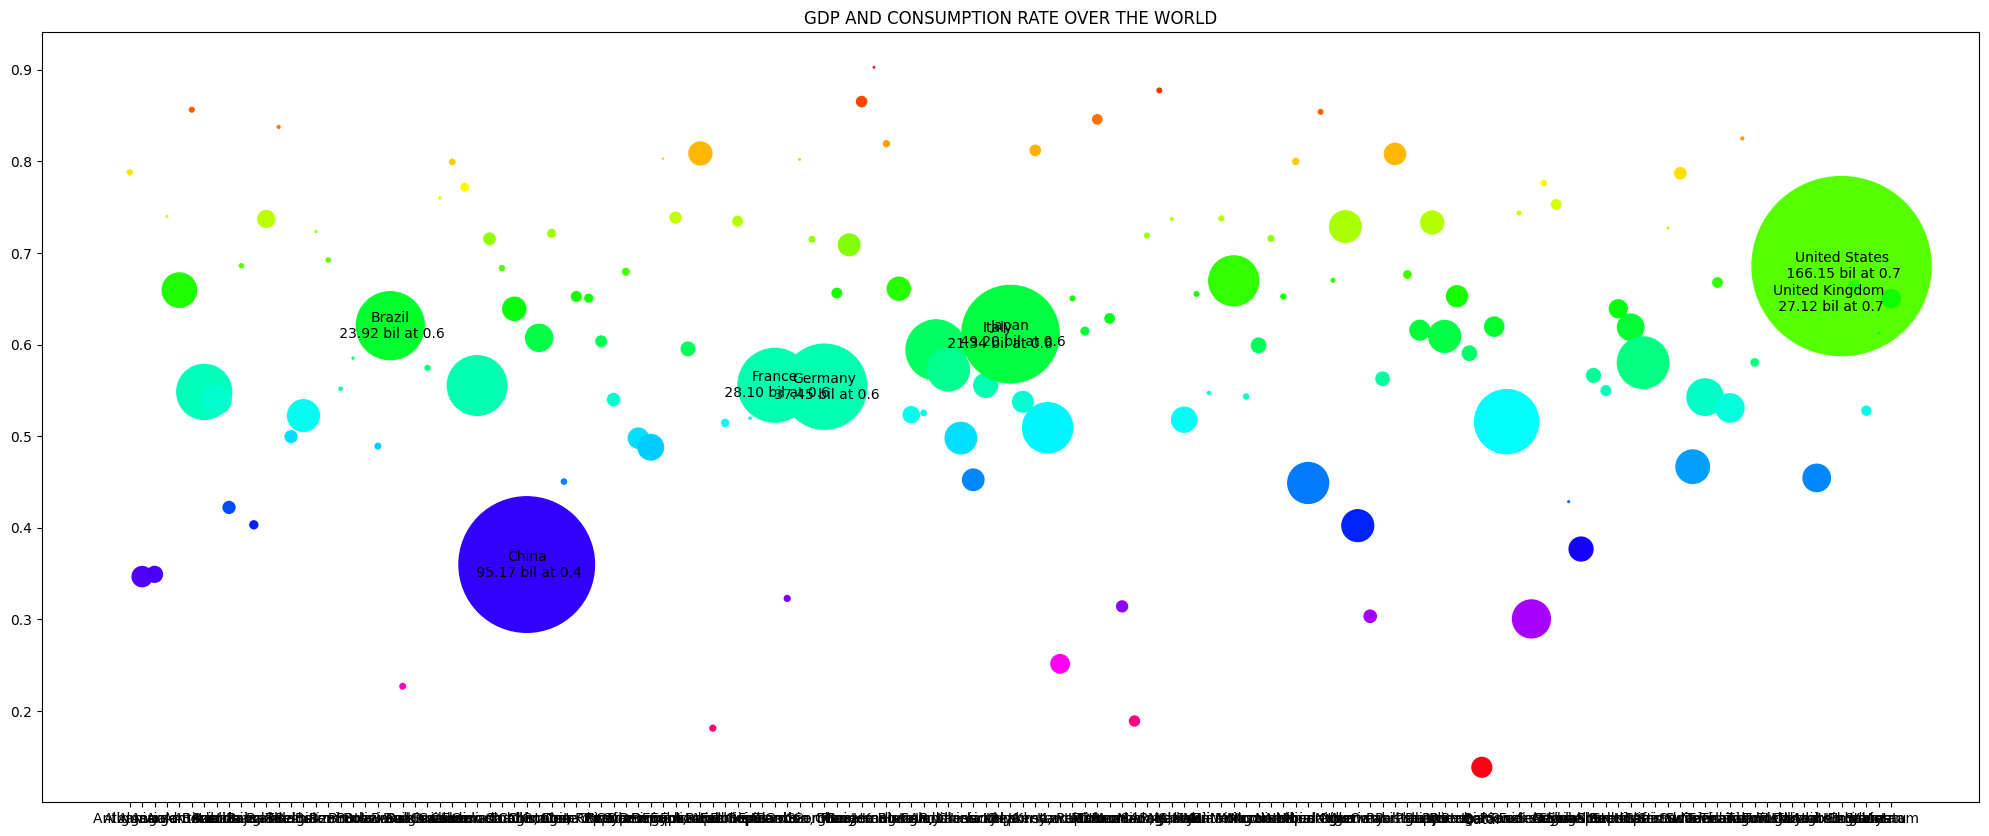

In [321]:
import numpy as np
import matplotlib.pyplot as plt


main_df_con3['GPD_usd_2'] = main_df_con3['GPD_usd']/10**9

radius   = main_df_con3['consumption_percent_2']
angles   = main_df_con3['CountryName']
area     = 10**(-7) * main_df_con3['GPD_usd']


colors = radius

fig = plt.figure(figsize=(25, 10))
#ax = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv_r)

# Add gridlines
ax.grid(True)

cbar = plt.colorbar(c, ax=ax)
cbar.set_label('Consumption (% GDP)')

plt.title('GDP AND CONSUMPTION RATE OVER THE WORLD')
# Add labels for each point
top_5_per = main_df_con3['GPD_usd'].quantile(0.95)
filtered_data = main_df_con3[main_df_con3['GPD_usd'] >= top_5_per]

radius_2 = filtered_data['consumption_percent_2']
angles_2 = filtered_data['CountryName']
for i, (ang, rad) in enumerate(zip(angles_2, radius_2)):
    data = filtered_data.iloc[i][['CountryName', 'GPD_usd_2', 'consumption_percent_2']]
    gpd = "{:.2f}".format(data['GPD_usd_2'])
    consumption = "{:.1f}".format(data['consumption_percent_2'])
    text = f"{data['CountryName']}\n {gpd} bil at {consumption}"
    plt.text(ang, rad, text, ha='center', va='center')


ax.xaxis.grid(False)  # Remove radial gridlines
ax.set_xticklabels([])  # Remove x-label

plt.show()
